# **Regression Project: Boston House Price Prediction**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [4]:
# Import libraries that read and process data.
import pandas as pd
import numpy as np
# Import libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries that build linear regression model.
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Import library for graphical goodness-of-fit plots.
from statsmodels.graphics.gofplots import ProbPlot
# Import library that splits data.
from sklearn.model_selection import train_test_split
# Import library for data scaling.
from sklearn.preprocessing import MinMaxScaler
# Import the White test function for heteroskedasticity diagnostics (not used here, though).
from statsmodels.stats.diagnostic import het_white
# Import compatibility utility for zipping names and test results into readable format.
from statsmodels.compat import lzip
# Import statistical test functions (e.g., Goldfeld-Quandt test for heteroskedasticity).
import statsmodels.stats.api as sms
# Import pylab for plotting and numerical analysis (combines features of numpy and matplotlib).
import pylab
# Import the stats module from scipy, providing access to a wide range of statistical functions and probability distributions.
import scipy.stats as stats
# Import the skew function from scipy.stats to measure the asymmetry of data distributions.
from scipy.stats import skew
# Import necessary metrics from sklearn.
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
# Import cross-validation utility to assess model performance stability.
from sklearn.model_selection import cross_val_score
# Import the correlation function.
from scipy.stats import pearsonr
# Import VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import warnings library to suppress warnings during execution.
import warnings
warnings.filterwarnings("ignore") # Ignore warnings.

## **Data Overview**

In [6]:
# Read the data.
df = pd.read_csv("Boston.csv")
# View the first five rows.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
# View the last five rows.
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [8]:
# View data dimension.
df.shape

(506, 13)

In [9]:
# View data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**
- CHAS is technically a categorical variable. The dataset treats it as a dummy variable.

In [11]:
# Check missing values.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
# Check duplicates.
df.duplicated().sum()

0

In [13]:
# Count unique values under each column.
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

**Observations**
- The dataset is structurally clean with no missing or duplicate records, indicating it's well-prepared for initial analysis and modeling. However, further quality checks such as outlier detection, distribution analysis, variable importance, and bias assessment are still necessary to ensure analytical validity.

## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

In [17]:
# Check the summary Statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations**

- There are 506 observations and no missing value in any variable.
- Several features show skewed distributions — for example, CRIM (crime rate) has a mean of 3.61 but a median of only 0.26, and a maximum value of 88.98, suggesting the presence of significant outliers. Similarly, LSTAT and ZN also show positive skew.
- CHAS is a binary variable indicating proximity to the Charles River, with only ~7% of the data having a value of 1. The target variable, MEDV (median home value), ranges from 5 to 50, with many values clustered near the upper cap of 50, which may reflect a data ceiling and could affect linear regression results.
- Features such as RAD and TAX also have high variability, with large standard deviations, indicating the need for scaling before regularized modeling (like Ridge or Lasso). Additionally, some features (e.g., CRIM, DIS, LSTAT) may benefit from log transformation due to heavy skewness.
- Overall, the data is clean and ready for modeling, though feature engineering and normalization should be considered for better model performance.

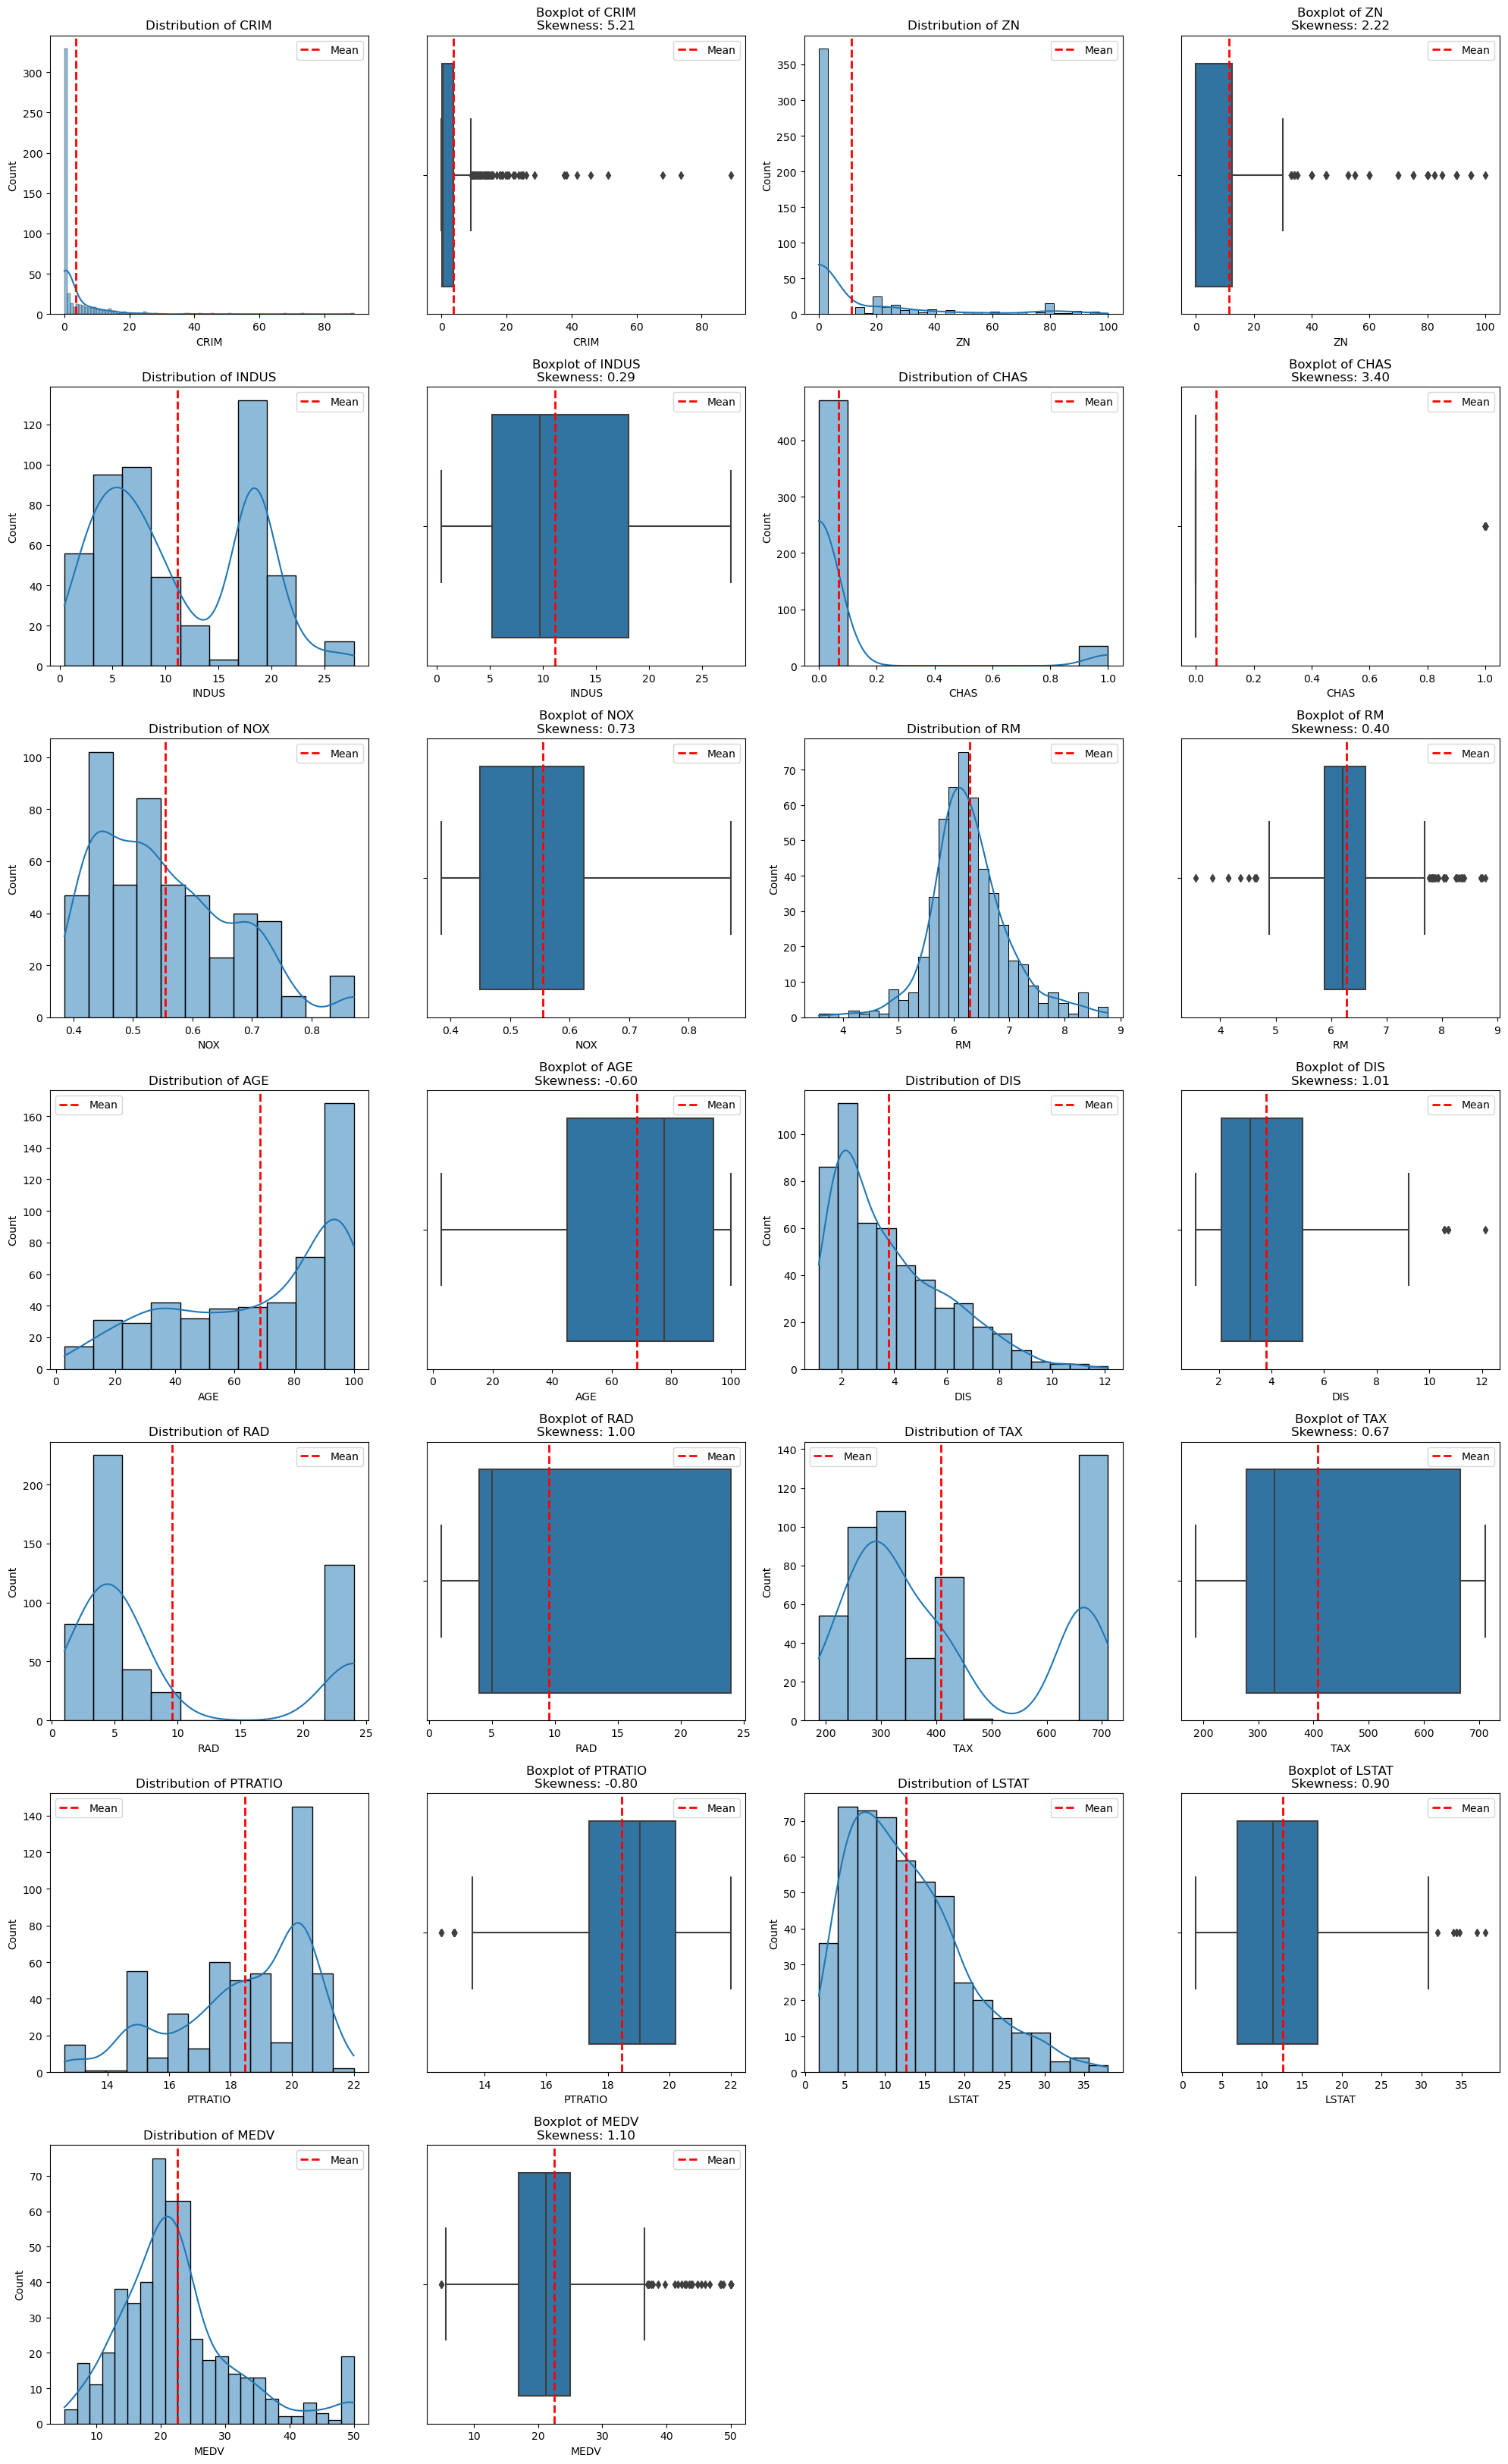

In [19]:
# Set the figure size.
plt.figure(figsize=(20, 60))
# Iterate each column from the original dataset.
for i, column in enumerate(df.columns, 1):
    
    # -------- Histogram subplot --------
    # Set the first subplot position (an odd position).
    plt.subplot(len(df.columns), 4, 2 * i - 1)
    # Draw the histogram.
    sns.histplot(df[column], kde=True)
    # Draw a red dash line of the average value.
    plt.axvline(df[column].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    # Set the title.
    plt.title(f'Distribution of {column}')
    # Set the legend.
    plt.legend()

    # -------- Boxplot subplot --------
    # Set the second subplot position (an even position).
    plt.subplot(len(df.columns), 4, 2 * i)
    # Draw the boxplot.
    sns.boxplot(x=df[column])
    # Draw a red dash line of the average value.
    plt.axvline(df[column].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    # Compute skewness.
    sk_value = skew(df[column].dropna())
    # Set the title and add skewness as text annotation.
    plt.title(f'Boxplot of {column}\nSkewness: {sk_value:.2f}')
    # Set the legend.
    plt.legend()

# Adjust spacing to prevent overlap between subplots.
plt.tight_layout()
# Show all plots.
plt.show()

**Observations**
- **CRIM (Crime Rate):**
  
  The distribution is significantly right-skewed with noticeable outliers. This indicates that while most towns have low crime rates, a few towns experience unusually high crime, skewing the distribution.

- **ZN (Residential Land Zoned Over 25,000 sq.ft.):**
  
  Also right-skewed, with the majority of values clustered below 10%. This is intuitive, as most households do not require large lot sizes.

- **INDUS (Non-retail Business Proportion):**
  
  Shows a bimodal tendency with a dip around the mid-value (~15), indicating that towns tend to either have low or high industrial areas, with few falling in the middle.

- **CHAS (Proximity to Charles River):**

  Effectively a categorical binary variable. The vast majority of entries are 0, meaning most towns do not border the Charles River.

- **NOX (Nitric Oxide Concentration):**

  Slightly right-skewed, suggesting that most towns have relatively low pollution levels, with a few areas showing higher concentrations.

- **RM (Average Number of Rooms):**

  Fairly symmetric distribution, suggesting a relatively balanced spread of housing size across towns.

- **AGE (Proportion of Pre-1940 Structures):**

  Left-skewed. Most towns have a higher share of older homes, indicating a generally aged housing stock.

- **DIS (Distance to Employment Centers):**

  Right-skewed, meaning most towns are located close to employment hubs in Boston, with fewer towns situated farther out.

- **RAD (Accessibility to Highways):**

  Exhibits an extreme U-shaped distribution, with clusters on both low and high ends. This may reflect contrasting homeowner preferences:

    - High RAD: prioritizing convenience and highway access.
    - Low RAD: favoring quiet neighborhoods, lower housing costs, or proximity to work without highway reliance.

  Despite this polarization, the distribution retains a degree of symmetry, suggesting a trade-off balance in housing choices.

- **TAX (Property Tax Rate):**
  Right-skewed, indicating most towns have moderate taxes, but a few areas impose very high property taxes. There are no towns with mid-range (~$5-6k) taxes, creating a gap in the distribution.

- **PTRATIO (Pupil-Teacher Ratio):**
  Slightly left-skewed, suggesting that many towns have higher teacher density, possibly due to a younger population or stronger education investment.

- **LSTAT (Lower Status Population %):**
  Right-skewed, meaning most towns have a smaller proportion of low-income residents, while a few towns have significantly higher values.

- **MEDV (Median Home Value):**
  Right-skewed with several outliers at the high end. However, the left side follows a normal-like pattern, indicating a consistent lower-end pricing structure. A log transformation is recommended for modeling to normalize the skew and stabilize variance.

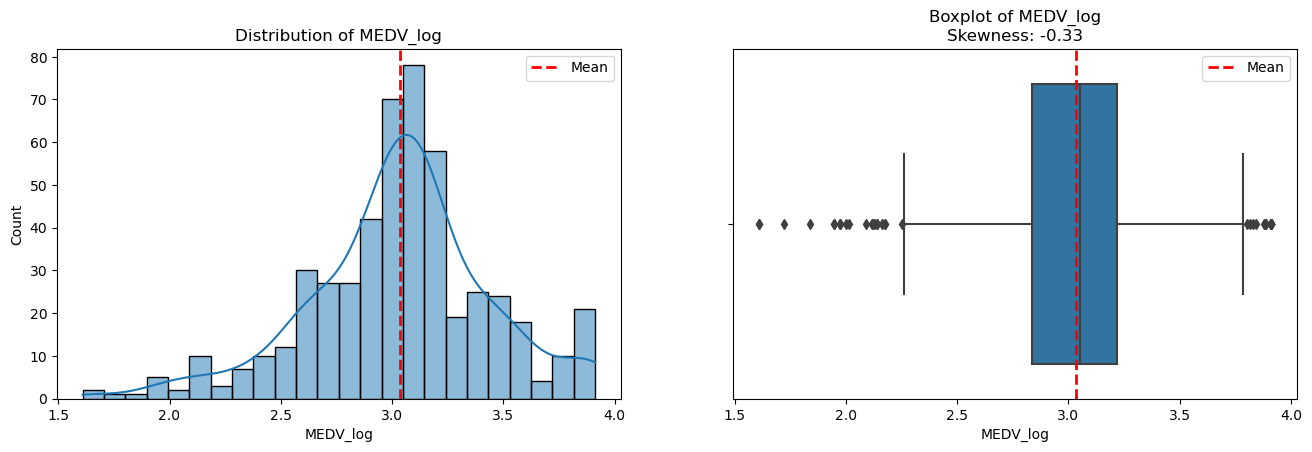

In [21]:
# Take MEDV log transformation.
df['MEDV_log'] = np.log(df['MEDV'])
# Set the figure size.
plt.figure(figsize=(16, 10))
# Set the first subplot position.
plt.subplot(2, 2, 1)
# Draw the histogram.
sns.histplot(data = df, x = 'MEDV_log', kde = True)
# Draw a red dash line of the average value.
plt.axvline(df['MEDV_log'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
# Set the title.
plt.title(f'Distribution of MEDV_log')
# Set the legend.
plt.legend()
# Set the second subplot position (an even position).
plt.subplot(2, 2, 2)
# Draw the boxplot.
sns.boxplot(x=df['MEDV_log'])
# Draw a red dash line of the average value.
plt.axvline(df['MEDV_log'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
# Compute skewness.
sk_value = skew(df['MEDV_log'].dropna())
# Set the title and add skewness as text annotation.
plt.title(f'Boxplot of MEDV_log\nSkewness: {sk_value:.2f}')
# Set the legend.
plt.legend()
# Show all plots.
plt.show()

**Observation**
The log-transformed variable (MEDV_log) appears to have a nearly normal distribution without skew, and hence we can proceed.

### **Bivariate Analysis**

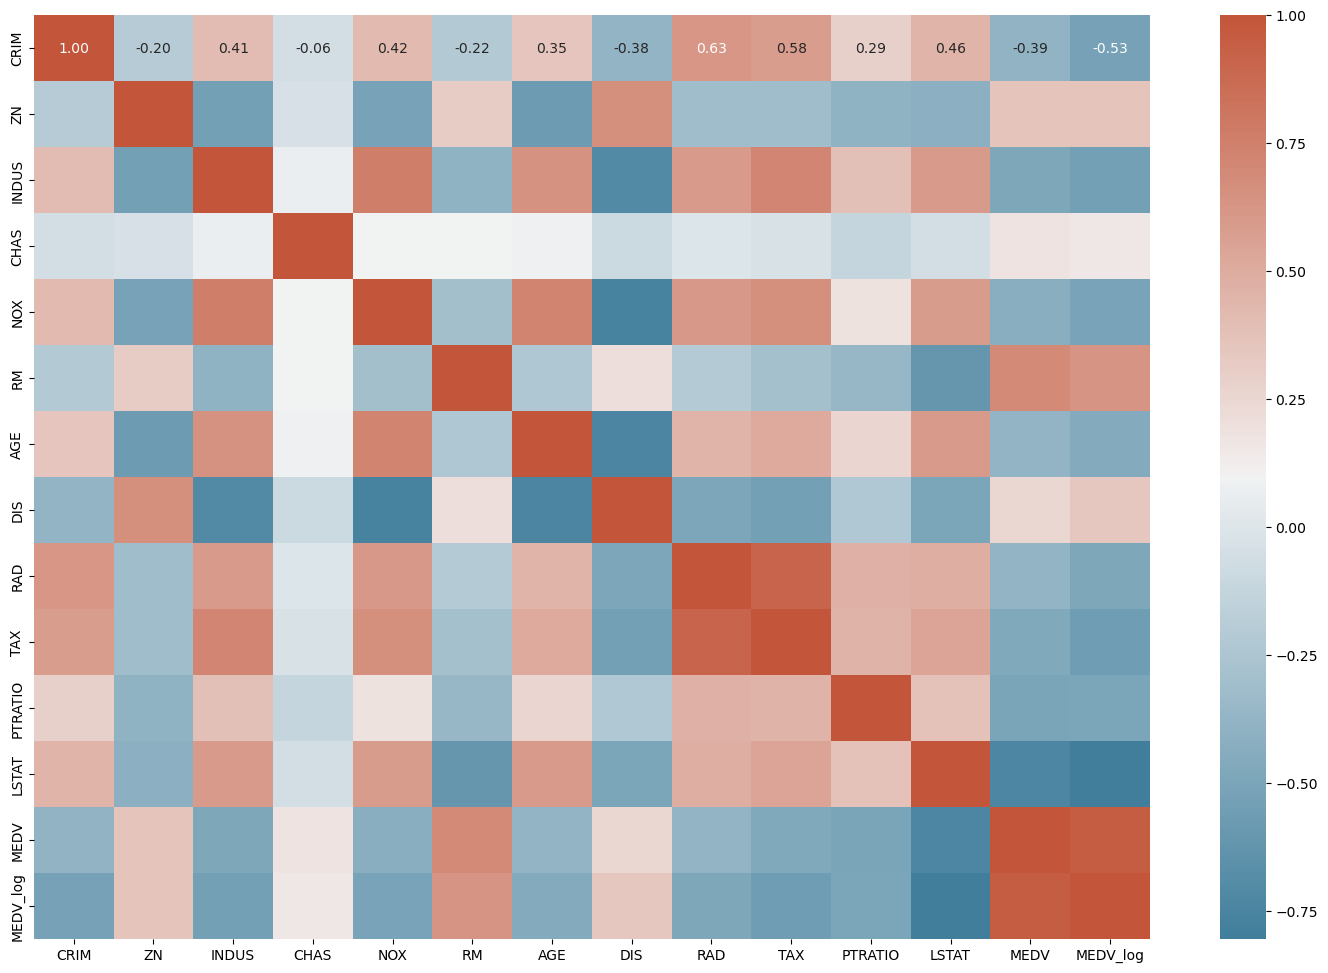

In [24]:
# Set figure size.
plt.figure(figsize=(18, 12))
# Set color map.
cmap = sns.diverging_palette(230, 20, as_cmap = True)
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='0.2f', cmap = cmap)
# Display the plots.
plt.show()

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

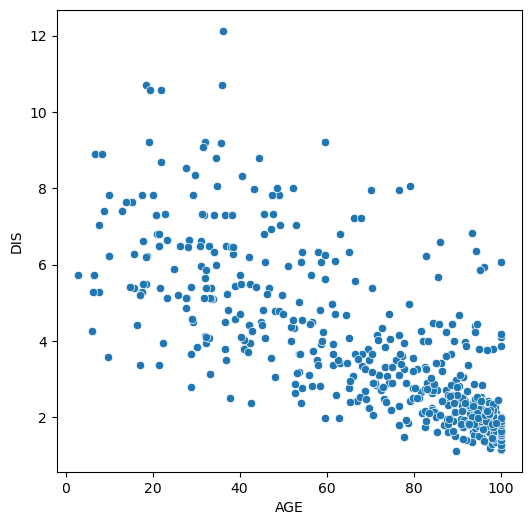

In [26]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
# Show plot.
plt.show()

**Observations**

- The distance of houses to Boston employment centers appears to decrease moderately as the proportion of older houses increases in a town. This suggests that employment centers may be located in more established areas where a higher proportion of housing was built before 1940. These older, historically developed towns likely formed the early urban core around which Boston expanded.

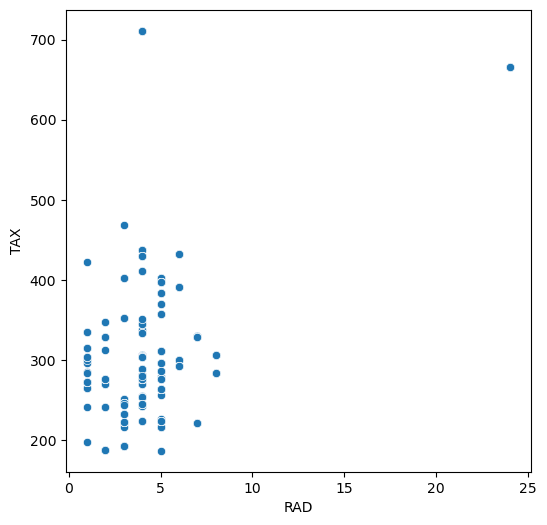

In [28]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
# Show plot.
plt.show()

**Observations**

- No clear pattern is observed between the distance to Boston employment centers and the proportion of older houses. The apparent positive correlation is likely driven by one or more outliers. After removing these outliers, the relationship should be reanalyzed to determine whether any meaningful trend exists.

In [30]:
# Remove the data with high tax rate.
df1 = df[df['TAX'] < 600]
# Calculate the correlation.
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observations**

- Slight trend: Towns with better access to radial highways may tend to have higher property taxes, perhaps due to:
    - Higher land value or demand in more accessible areas.
    - Municipal spending or infrastructure investments tied to accessibility.
- But weak: A 0.25 correlation is not strong enough to confidently claim a clear pattern. Other variables may play a stronger role in explaining property tax variations.

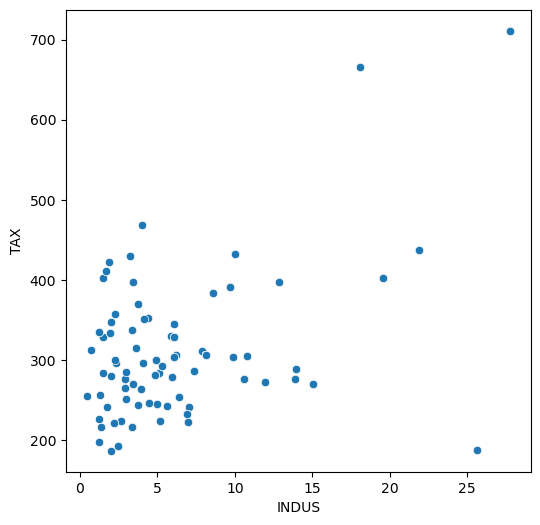

In [32]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
# Show plot.
plt.show()

**Observations**

- There is a weak positive correlation between the proportion of non-retail industrial land (INDUS) and property tax rates (TAX). While not a strong relationship, it suggests that towns with more industrial land may levy slightly higher property taxes. This may reflect zoning decisions or revenue-generation strategies that require further investigation.

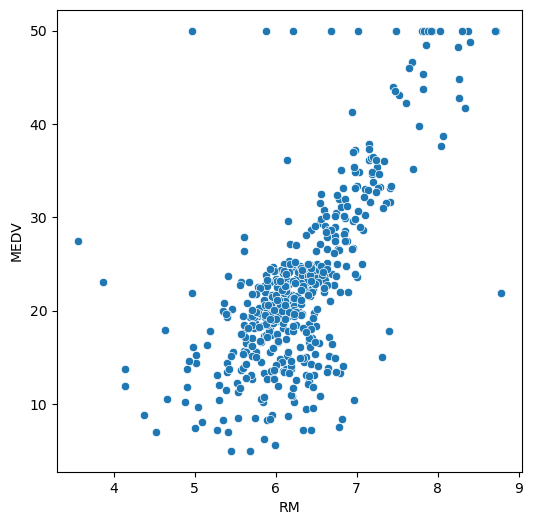

In [34]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
# Show plot.
plt.show()

**Observations**

- There is a clear positive correlation between the number of rooms (RM) and median house value (MEDV), which is logically expected—larger homes typically command higher prices. However, a few outliers exist with unusually high prices, which may reflect properties located in premium or highly desirable areas.

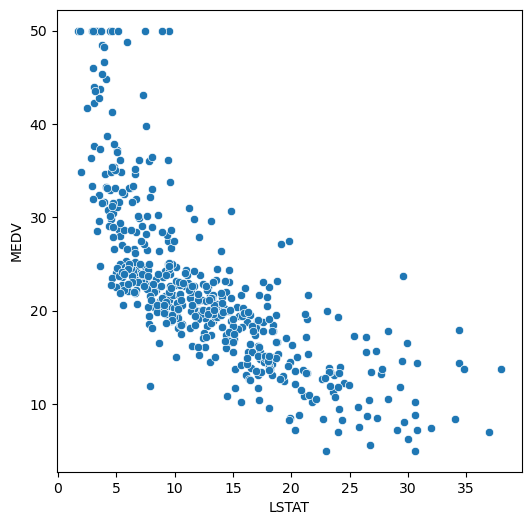

In [36]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
# Show plot.
plt.show()

**Observations**

- As expected, there is a strong negative correlation between the percentage of lower-income residents (LSTAT) and median home value (MEDV). This indicates that areas with a higher proportion of lower-status households tend to have lower property values. Notably, several observations are capped at a median value of 50, which may suggest a data ceiling effect or regulatory/reporting limit. Further investigation is needed to confirm the cause.

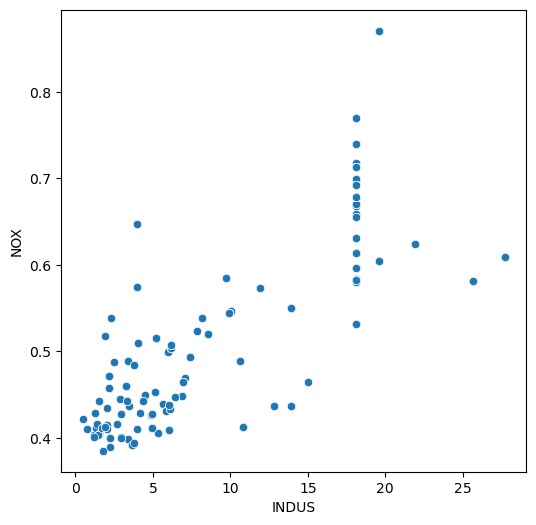

In [38]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)
# Show plot.
plt.show()

**Observations**:

- Industrial areas have more transportation-related activity, contributing to higher air pollution (NOX).

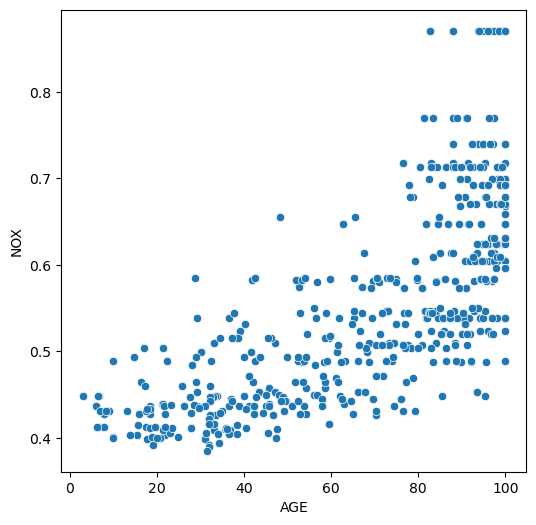

In [40]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'AGE', y = 'NOX', data = df)
# Show plot.
plt.show()

**Observations**

- There appears to be a positive correlation between the proportion of older homes (AGE) and nitrogen oxide concentration (NOX). This suggests that older neighborhoods may be associated with higher pollution levels, possibly due to aging infrastructure, proximity to older industrial zones, or outdated environmental regulations at the time of development.

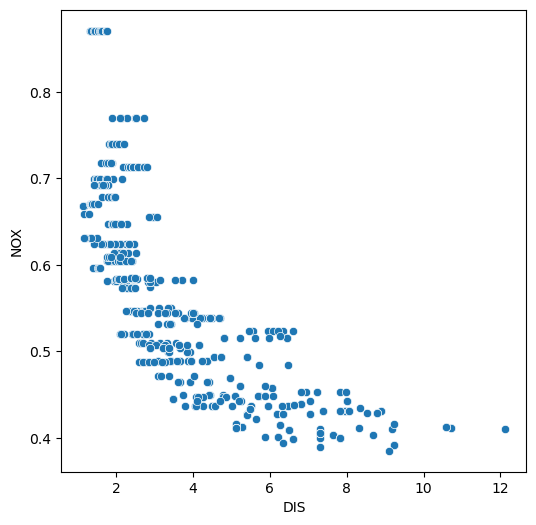

In [42]:
# Set figure size.
plt.figure(figsize = (6, 6))
# Draw a scatter plot.
sns.scatterplot(x = 'DIS', y = 'NOX', data = df)
# Show plot.
plt.show()

**Observations**

- There is a clear negative correlation between nitrogen oxide concentration (NOX) and distance to employment centers (DIS). This suggests that areas closer to the city center tend to experience higher pollution levels, likely due to increased traffic, higher population density, and greater industrial or vehicular activity.

## **Model Building - Linear Regression**

### **Split dataset**

In [46]:
# Assign the target variable to Y.
Y = df['MEDV_log']
# Drop the columns to get the feature matrix X.
X = df.drop(columns={'MEDV', 'MEDV_log'})
# Add a constant column to X using statsmodels' add_constant function.
X = sm.add_constant(X)

In [47]:
# Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### **Check for Multicollinearity**

In [49]:
def checking_vif(train):
    # Create an empty DataFrame to store the VIF results.
    vif = pd.DataFrame()
    # Add a column named 'feature' containing the names of the input DataFrame's columns (i.e., feature names).
    vif["feature"] = train.columns
    # Calculating VIF for each feature.
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations**
| Feature   | VIF        | Interpretation                                                           |
| --------- | ---------- | ------------------------------------------------------------------------ |
| `const`   | **535.37** | This is the intercept term. High VIF is normal and not a concern.        |
| `CRIM`    | 1.92       | Low multicollinearity. Safe to keep.                                     |
| `ZN`      | 2.74       | Low to moderate correlation. Acceptable.                                 |
| `INDUS`   | 4.00       | Moderate multicollinearity. Watch if combined with others.               |
| `CHAS`    | 1.08       | Very low multicollinearity. Safe to keep.                                |
| `NOX`     | 4.40       | Moderate multicollinearity. Acceptable.                                  |
| `RM`      | 1.86       | Low multicollinearity. Safe to keep.                                     |
| `AGE`     | 3.15       | Moderate. Acceptable, but somewhat related to others like `DIS`.         |
| `DIS`     | 4.36       | Moderate. Possibly linked to `NOX`, `AGE`, or `RAD`.                     |
| `RAD`     | **8.35**   | High multicollinearity. Flag for review. Strongly correlated with `TAX`. |
| `TAX`     | **10.19**  | Very high. Serious multicollinearity. Likely overlaps with `RAD`.        |
| `PTRATIO` | 1.94       | Low. Safe.                                                               |
| `LSTAT`   | 2.86       | Low to moderate. Acceptable.                                             |

In [51]:
# Create the model after dropping TAX.
X_train = X_train.drop(columns={'TAX'})
# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


**Observations**

- Previously, TAX had a very high VIF (10.19), suggesting strong multicollinearity, especially with RAD and INDUS.

- After dropping TAX, RAD's VIF dropped significantly from 8.35 to 2.94.

- Overall, the multicollinearity has improved.

In [53]:
# Create the model.
model1 = sm.OLS(y_train, X_train).fit()
# Get the model summary.
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          1.40e-101
Time:                        22:04:11   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Assign the target variable to Y.
Y = df['MEDV_log']
# Drop insignificant columns.
X = df.drop(columns={'ZN', 'INDUS', 'AGE', 'TAX', 'MEDV', 'MEDV_log'})
# Add a constant column to X using statsmodels' add_constant function.
X = sm.add_constant(X)
# Split the data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)
# Create the model.
model2 = sm.OLS(y_train, X_train).fit()
# Get the model summary.
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          2.61e-104
Time:                        22:04:11   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**

- Overall Fit
    - R-squared = 0.767: About 76.7% of the variance in MEDV_log is explained by your predictors — strong for housing data.
    - Adjusted R-squared = 0.762: Very close to R², indicating a good fit without overfitting.
    - F-statistic = 142.1, p < 0.000: The model as a whole is highly significant.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

In [57]:
# Get residuals.
residuals = model2.resid
# Get mean residuals.
np.mean(residuals)

-1.41945463543883e-15

**Observations**

- The mean of the residuals is approximately zero, satisfying one of the key assumptions of linear regression. This indicates that the model’s predictions are, on average, unbiased.

In [59]:
# Set labels for the output of the Goldfeld-Quandt test.
name = ["F statistic", "p-value"]
# Run the Goldfeld-Quandt test for heteroskedasticity.
test = sms.het_goldfeldquandt(y_train, X_train)
# Format and display the test result with labels.
lzip(name, test)

[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

**Observations**

- Since the p-value of the test (e.g., Breusch-Pagan or White test) is greater than 0.05, we fail to reject the null hypothesis that the residuals exhibit constant variance (homoscedasticity). This suggests that the assumption of homoscedasticity is not violated and is therefore satisfied.

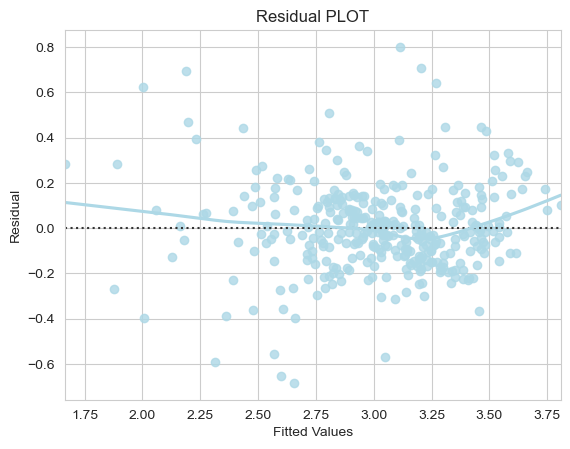

In [61]:
# Get the fitted (predicted) values from the regression model.
fitted = model2.fittedvalues
# Set Seaborn's plot style to "whitegrid" for better aesthetics (currently commented out).
sns.set_style("whitegrid")
# Create a residual plot using Seaborn:
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)
# Label the x-axis.
plt.xlabel("Fitted Values")
# Label the y-axis.
plt.ylabel("Residual")
# Add a title to the plot.
plt.title("Residual PLOT")
# Show the plot.
plt.show()

**Observation**

- The residuals vs. fitted values plot shows no clear pattern or systematic structure, which indicates that the assumption of linearity and correct model specification is satisfied. This means the model captures the main relationship between the predictors and the response variable appropriately, without major signs of omitted variables or non-linear effects.

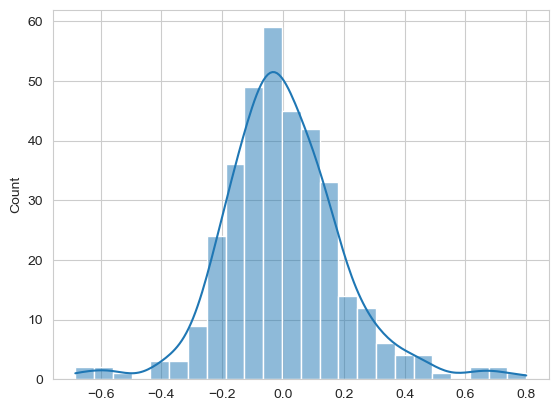

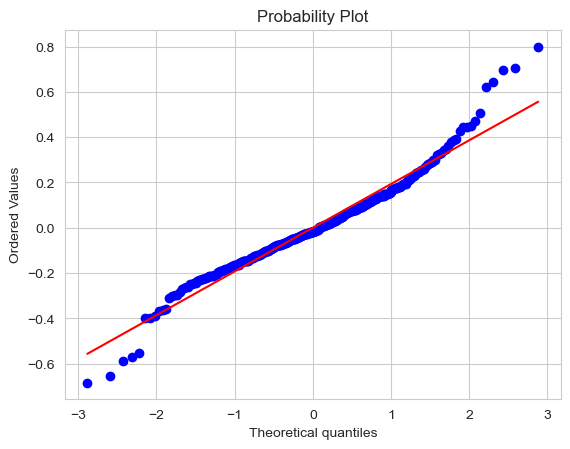

In [63]:
# Plot histogram of residuals.
sns.histplot(residuals, kde=True)
# Show the plot.
plt.show()
# Plot q-q plot of residuals
stats.probplot(residuals, dist = "norm", plot = pylab)
# Show the plot.
plt.show()

**Observatoion**

- From the residual distribution and Q-Q plot, the residuals appear to follow a roughly normal distribution, with only minor deviations at the tails. Therefore, the assumption of normally distributed residuals is reasonably satisfied.
- With all key regression assumptions checked and validated, we now proceed to evaluate model performance using the training and test datasets.

In [65]:
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

def model_perf(olsmodel, x_train, x_test):
    """
    Evaluate the model performance and print the result.
    
    Parameters
    ----------
    olsmodel : statsmodels.regression.linear_model.RegressionResultsWrapper
        The OLS model .
    x_train : pandas.core.frame.DataFrame
        Training dataset.
    x_test : pandas.core.frame.DataFrame
        Test dataset.

    Returns
    -------
    None.

    """

    # Make in-sample prediction on training data.
    y_pred_train = olsmodel.predict(x_train)
    # Set observed training data.
    y_observed_train = y_train
    # Make prediction on test data.
    y_pred_test = olsmodel.predict(x_test)
    # Set observed test data.
    y_observed_test = y_test
    # Print performance metrics in a DataFrame.
    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )

# Check model2 performance.
model_perf(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations**

📌 Consistent Performance Across Datasets:

- The RMSE, MAE, and MAPE values are very similar between training and testing sets.

- This suggests the model generalizes well and is not overfitting or underfitting.

📌 Low Error Values:

- All error metrics (RMSE, MAE) are relatively low, indicating that the model predictions are close to the actual values.

- The MAPE values (~5%) also show that the average percentage error is quite small, which is a strong indicator of reliable predictions.

📌 Slightly Higher Error on Test Set:

- The test set has marginally higher MAE and MAPE, which is expected in most models due to unseen data.

- The difference is minimal, suggesting stable performance.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [68]:
# Build a linear regression model instance.
linearregression = LinearRegression()
# Perform 10-fold cross-validation and compute R² (default scoring).
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv=10) # cross_val_score returns an array of R² scores from each fold
# Perform 10-fold cross-validation and compute negative mean squared error (MSE).
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
# Print mean R² and confidence interval (± 2 standard deviations).
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
# Print mean MSE and confidence interval (± 2 standard deviations).
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1 * cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**

**R-Squared (R²): 0.734 ± 0.231**

📌 Mean (0.734):

- On average, the model explains 73.4% of the variance in the target variable across folds.

- This indicates a fairly strong model fit.

📌 Standard Deviation (±0.231):

- There's moderate variability in R² across the different cross-validation folds.

- A high spread (std dev > 0.2) suggests that model performance is inconsistent on different subsets of the data.

- This could mean the model is sensitive to data splits or that data heterogeneity exists.

**Mean Squared Error (MSE): 0.040 ± 0.023**

📌 Mean (0.040):

- The average squared prediction error is 0.040, which is relatively low, indicating that predictions are close to actual values.

📌 Standard Deviation (±0.023):

- There is some variation in the prediction error across folds.

- A larger standard deviation relative to the mean (here, over 50%) again suggests **inconsistent model performance or noisy data**.

**Summary**: The model performs reasonably well on average, but the high variability indicates:

- You should consider checking data quality, feature selection, or model robustness.

- Try more folds (e.g., 10-fold CV) or stratified sampling, or use ensemble models to reduce variability.

- If possible, review whether certain subsets of the data cause the model to perform significantly worse.

### **Final Model**

In [71]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


**Observations**

| Feature     | Coefficient | Interpretation                                                                                                                |
| ----------- | ----------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **const**   | 4.6494      | The predicted log(MEDV) when all other features are zero.                                                                     |
| **CRIM**    | -0.0125     | A unit increase in per capita crime rate is associated with a \~1.25% decrease in house price (since log scale).              |
| **CHAS**    | +0.1198     | Houses bordering the Charles River are associated with \~11.98% higher prices.                                                |
| **NOX**     | -1.0562     | A unit increase in NOX levels leads to a large decrease (\~105%) in price — indicating strong negative effect from pollution. |
| **RM**      | +0.0589     | Each additional room increases price by \~5.89%. Positive and significant.                                                    |
| **DIS**     | -0.0441     | Greater distance from employment centers slightly reduces price.                                                              |
| **RAD**     | +0.0078     | Better highway access increases house value slightly. May also reflect urban location.                                        |
| **PTRATIO** | -0.0485     | Higher pupil-teacher ratios slightly reduce home value. Indicates quality of local education matters.                         |
| **LSTAT**   | -0.0293     | A 1% increase in lower-status population is associated with a 2.93% decrease in value — one of the strongest predictors.      |


## **Actionable Insights and Recommendations**

**Crime Rate (CRIM)**

- Insight:
  - Higher crime rates are significantly associated with lower housing prices.
- Action:
  - Local governments should prioritize crime prevention and community policing to support property values.
  - Real estate agents may highlight low-crime statistics in marketing materials.

**Rooms per Dwelling (RM)**
- Insight:
    - More rooms strongly correlate with higher prices.
- Action:
    - Developers should consider building homes with more spacious interiors, particularly in areas targeting higher-income buyers.
    - Homeowners looking to increase property value may consider adding or marketing spare rooms.

**Proximity to Charles River (CHAS)**
- Insight:
    - Properties along the Charles River command higher prices.
- Action:
    - Urban planners and marketers should leverage waterfront proximity as a premium feature.
    - Encourage sustainable development along river-adjacent zones to maintain value.

**Nitric Oxides (NOX) Pollution**
- Insight:
    - High NOX levels significantly decrease property values.
- Action:
    - Municipalities should work with environmental agencies to reduce industrial emissions and traffic congestion.
    - Real estate agents should acknowledge air quality in pricing and disclosure, especially in high-NOX zones.

**Distance to Employment Centers (DIS)**
- Insight:
    - Greater distance from employment centers is linked to lower house prices.
- Action:
    - Invest in transit infrastructure to reduce commute times and support suburban property values.
    - Employers can consider satellite offices or remote work flexibility to increase housing appeal in farther suburbs.

**Access to Highways (RAD)**
- Insight:
    - Moderate positive impact on price, likely due to commuting convenience.
- Action:
    - Maintain strategic access to major highways in zoning plans while minimizing associated noise/pollution.
    - Promote balanced development that provides both access and livability.

**Pupil-Teacher Ratio (PTRATIO)**
- Insight:
    - Higher student-teacher ratios correlate with lower property values.
- Action:
    - Invest in local education to improve ratios, which in turn can uplift property values.
    - Highlight strong school systems in real estate marketing.

**Lower Income Population (LSTAT)**
- Insight:
    - Higher proportion of low-income households correlates with lower property values.
- Action:
    - Target community development and support services in these neighborhoods.
    - Policymakers should ensure affordable housing initiatives are matched with education and employment programs.

📌 **Recommendations for Stakeholders**
- City Planners
    - Invest in crime reduction, public transit, and pollution control.
- Developers
    - Build larger homes near transit and low-NOX areas.
- Homeowners
    - Add rooms or improve energy efficiency to boost value.
- Buyers
    - Look for undervalued areas with improving infrastructure or schools.
- Realtors
    - Emphasize proximity to river, number of rooms, and local school quality.

___